In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('heart.csv')

In [4]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [5]:
data_dup = data.duplicated().any()

In [6]:
data_dup

np.True_

In [7]:
data = data.drop_duplicates()

In [8]:
data_dup = data.duplicated().any()

In [9]:
data_dup

np.False_

In [10]:
cate_val = []
cont_val = []
for column in data.columns:
    if data[column].nunique() <= 10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [11]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [12]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [13]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [14]:
data['cp'].unique()

array([0, 1, 2, 3])

In [15]:
cate_val.remove('sex')
cate_val.remove('target')
data = pd.get_dummies(data, columns=cate_val, drop_first=True)

In [16]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
sc = StandardScaler()
data[cont_val] = sc.fit_transform(data[cont_val])

In [19]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [20]:
X = data.drop('target', axis=1)
y = data['target']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
y_train

,target
163,0
291,0
280,1
85,1
239,0
...,...
267,0
77,0
125,1
522,1


In [24]:
y_test

,target
245,1
349,0
135,0
389,1
66,1
...,...
402,1
123,1
739,0
274,1


In [25]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [29]:
y_pred1 = log.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [31]:
accuracy_score(y_test, y_pred1)

0.7868852459016393

In [41]:
from sklearn.svm import SVC

In [42]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [43]:
y_pred2 = svm_model.predict(X_test)

In [44]:
accuracy_svm = accuracy_score(y_test, y_pred2)
print(f"Accuracy of SVM model: {accuracy_svm}")

Accuracy of SVM model: 0.8032786885245902


In [45]:
conf_matrix_svm = confusion_matrix(y_test, y_pred2)
print(f"Confusion Matrix of SVM model:\n{conf_matrix_svm}")

Confusion Matrix of SVM model:
[[24  8]
 [ 4 25]]


In [46]:
class_report_svm = classification_report(y_test, y_pred2)
print(f"Classification Report of SVM model:\n{class_report_svm}")

Classification Report of SVM model:
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        32
           1       0.76      0.86      0.81        29

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61



Now that we have evaluated both the Logistic Regression and SVM models, we can compare their performance based on the accuracy, confusion matrix, and classification report to determine which model is better suited for this dataset.

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [49]:
y_pred3 = knn.predict(X_test)

In [50]:
accuracy_score(y_test, y_pred3)

0.7377049180327869

In [51]:
score = []

for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score.append(accuracy_score(y_test, y_pred))

In [52]:
score

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

In [53]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.8032786885245902

In [86]:
data = pd.read_csv('heart.csv')

In [87]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [88]:
data = data.drop_duplicates()

In [89]:
X = data.drop('target', axis=1)
y = data['target']

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
rf = RandomForestClassifier()
rf.fit(X, y)

RandomForestClassifier()

In [92]:
import pandas as pd

In [93]:
new_data = pd.DataFrame({
    'age': [52],
    'sex': [1],
    'cp': [0],
    'trestbps': [125],
    'chol': [212],
    'fbs': [0],
    'restecg': [1],
    'thalach': [168],
    'exang': [0],
    'oldpeak': [1.0],
    'slope': [2],
    'ca': [2],
    'thal': [3]
},index=[0])

In [94]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [97]:
p = rf.predict(new_data)
if p[0] == 0:
    print('Patient no Heart Disease')
else:
    print('Patient has Heart Disease')

Patient no Heart Disease


In [98]:
import joblib

In [99]:
joblib.dump(rf, 'heart_disease_prediction_model')

['heart_disease_prediction_model']

In [100]:
model = joblib.load('heart_disease_prediction_model')

In [101]:
model.predict(new_data)

array([0])

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [62]:
y_pred4 = dt.predict(X_test)

In [63]:
accuracy_score(y_test, y_pred4)

0.7049180327868853

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [67]:
y_pred5 = rf.predict(X_test)

In [68]:
accuracy_score(y_test, y_pred5)

0.8688524590163934

In [69]:
from sklearn.ensemble import GradientBoostingClassifier

In [70]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [71]:
y_pred6 = gbc.predict(X_test)

In [72]:
accuracy_score(y_test, y_pred6)

0.8032786885245902

In [74]:
final_data = pd.DataFrame({'Models':['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],'Accuracy':[accuracy_score(y_test,y_pred1),
                                                                                                                                             accuracy_score(y_test,y_pred2),
                                                                                                                                             accuracy_score(y_test,y_pred3),
                                                                                                                                             accuracy_score(y_test,y_pred4),
                                                                                                                                             accuracy_score(y_test,y_pred5),
                                                                                                                                             accuracy_score(y_test,y_pred6)]})

In [75]:
final_data

,Models,Accuracy
0,Logistic Regression,0.786885
1,SVM,0.803279
2,KNN,0.737705
3,Decision Tree,0.704918
4,Random Forest,0.868852
5,Gradient Boosting,0.803279


In [76]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='Accuracy'>

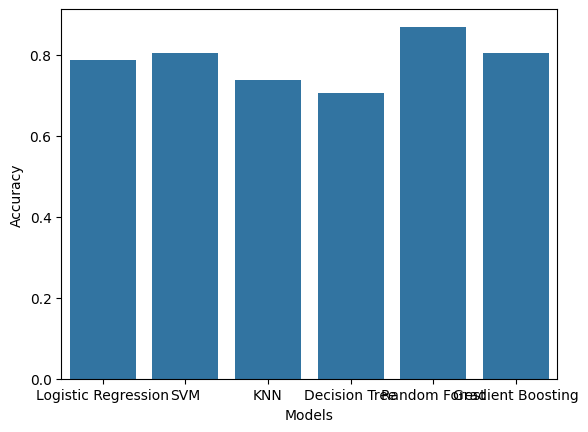

In [78]:
sns.barplot(x='Models', y='Accuracy', data=final_data)